<a href="https://colab.research.google.com/github/indrajau/Election-prediction/blob/main/Elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/indian-state-level-election.csv')

In [ ]:
df

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247
...,...,...,...,...,...,...,...,...,...,...,...
327289,West Bengal,2011.0,294,Murarai,GEN,Ajrail Md,M,IND,IND,2471.0,189320
327290,West Bengal,2011.0,294,Murarai,GEN,Shiblal Sardar,M,BSP,BSP,3074.0,189320
327291,West Bengal,2011.0,294,Murarai,GEN,Sudhiranjan Das Goswami,M,BJP,BJP,4961.0,189320
327292,West Bengal,2011.0,294,Murarai,GEN,Elahi Kamre Dr,M,CPM,CPM,73414.0,189320


In [ ]:
df.isnull().sum()

st_name           0
year              0
ac_no             0
ac_name       16083
ac_type           0
cand_name         0
cand_sex       5302
partyname         0
partyabbre     2706
totvotpoll        7
electors          0
dtype: int64

In [ ]:
df['ac_name'].value_counts()

Modakurichi         1116
Ramnagar             524
Nawabganj            491
Fatehpur             471
Shahabad             386
                    ... 
Suruhoto               2
Yingkiong-Pangin       2
Meriang-Mebo           2
Kakching               2
N.Vanlaiphai           1
Name: ac_name, Length: 6247, dtype: int64

In [ ]:
df['ac_name']=df['ac_name'].fillna('unknown')

In [ ]:
df['cand_sex'].value_counts()

M    307098
F     14883
O        11
Name: cand_sex, dtype: int64

In [ ]:
df['cand_sex']=df['cand_sex'].fillna('unknown')

In [ ]:
df['partyabbre'].value_counts()

IND       161929
INC        27036
BJP        19886
BSP        13014
SP          5137
           ...  
UMSK           1
IFTP           1
KDP            1
BPNSNP         1
KRSP           1
Name: partyabbre, Length: 1285, dtype: int64

In [ ]:
df['partyabbre']=df['partyabbre'].fillna('unknown')

In [ ]:
df['totvotpoll'].value_counts()

86.0       392
105.0      390
108.0      389
88.0       381
127.0      374
          ... 
21036.0      1
17502.0      1
10039.0      1
57801.0      1
77817.0      1
Name: totvotpoll, Length: 53067, dtype: int64

In [ ]:
df['totvotpoll'].median()

1022.0

In [ ]:
df['totvotpoll']=df['totvotpoll'].fillna(1022.0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327294 entries, 0 to 327293
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     327294 non-null  object 
 1   year        327294 non-null  float64
 2   ac_no       327294 non-null  int64  
 3   ac_name     327294 non-null  object 
 4   ac_type     327294 non-null  object 
 5   cand_name   327294 non-null  object 
 6   cand_sex    327294 non-null  object 
 7   partyname   327294 non-null  object 
 8   partyabbre  327294 non-null  object 
 9   totvotpoll  327294 non-null  float64
 10  electors    327294 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB


In [ ]:
df['st_name'].value_counts()

Uttar Pradesh                          60206
Bihar                                  38064
Maharashtra                            26727
Madhya Pradesh                         25062
Andhra Pradesh                         22012
Tamil Nadu                             22009
Karnataka                              17111
Rajasthan                              17051
West Bengal                            13334
Haryana                                12190
Gujarat                                11604
Odisha                                  8991
Assam                                   8321
Kerala                                  7712
Punjab                                  6589
National Capital Territory Of Delhi     6083
Jammu & Kashmir                         4978
Jharkhand                               4098
Himachal Pradesh                        3507
Chhattisgarh                            2961
Mizoram                                 1667
Uttarakhand                             1573
Arunachal 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['st_name']=le.fit_transform(df['st_name'])

In [ ]:
df['ac_name'].value_counts()

unknown             16083
Modakurichi          1116
Ramnagar              524
Nawabganj             491
Fatehpur              471
                    ...  
Suruhoto                2
Yingkiong-Pangin        2
Meriang-Mebo            2
Kakching                2
N.Vanlaiphai            1
Name: ac_name, Length: 6248, dtype: int64

In [ ]:
df['ac_name']=le.fit_transform(df['ac_name'])

In [ ]:
df['ac_type'].value_counts()

GEN      264812
SC        41821
ST        20625
BL           30
SANGH         6
Name: ac_type, dtype: int64

In [ ]:
df['ac_type']=df['ac_type'].replace(('GEN','SC','ST','BL','SANGH'),(0,1,2,3,4))

In [ ]:
df['cand_name'].value_counts()

None Of The Above         1779
Om Prakash                 428
Ashok Kumar                414
Raj Kumar                  293
Anil Kumar                 283
                          ... 
Raffi                        1
Chandrashekara Hampali       1
Mehtar M. Azzam              1
Muniswamy Gowda              1
Nure Alam Chowdhury          1
Name: cand_name, Length: 220531, dtype: int64

In [ ]:
df['cand_name']=le.fit_transform(df['cand_name'])

In [ ]:
df['cand_sex'].value_counts()

M          307098
F           14883
unknown      5302
O              11
Name: cand_sex, dtype: int64

In [ ]:
df['cand_sex']=df['cand_sex'].replace(('M','F','unknown','O'),(0,1,2,3))

In [ ]:
df['partyname'].value_counts()

Independent                 84448
Independents                53452
IND                         25180
Indian National Congress    21848
Bahujan Samaj Party          8251
                            ...  
LJSP                            1
RAPPRP                          1
BJJD                            1
RSWD                            1
BIP                             1
Name: partyname, Length: 1663, dtype: int64

In [ ]:
df['partyname']=le.fit_transform(df['partyname'])

In [ ]:
df['partyabbre'].value_counts()

IND       161929
INC        27036
BJP        19886
BSP        13014
SP          5137
           ...  
UMSK           1
IFTP           1
KDP            1
BPNSNP         1
KRSP           1
Name: partyabbre, Length: 1286, dtype: int64

In [ ]:
df['partyabbre']=le.fit_transform(df['partyabbre'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327294 entries, 0 to 327293
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     327294 non-null  int64  
 1   year        327294 non-null  float64
 2   ac_no       327294 non-null  int64  
 3   ac_name     327294 non-null  int64  
 4   ac_type     327294 non-null  int64  
 5   cand_name   327294 non-null  int64  
 6   cand_sex    327294 non-null  int64  
 7   partyname   327294 non-null  int64  
 8   partyabbre  327294 non-null  int64  
 9   totvotpoll  327294 non-null  float64
 10  electors    327294 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 27.5 MB


In [ ]:
x=df.drop(['electors'],axis=1)
y=df['electors']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
s1=dt.score(x_test,y_test)

In [ ]:
s1

0.9907724681762803

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r1=r2_score(y_test,y_pred)

In [ ]:
r1

0.9907724681762803

In [ ]:
x.keys()

Index(['st_name', 'year', 'ac_no', 'ac_name', 'ac_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll'],
      dtype='object')

## 'st_name', 'year', 'ac_no', 'ac_name', 'ac_type', 'cand_name','cand_sex', 'partyname', 'partyabbre', 'totvotpoll'

In [ ]:
dt.predict([[0,1928,1,2244,0,209115,0,671,485,4427]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([83247.])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
s2=lr.score(x_test,y_test)

In [ ]:
s2

0.3589631703260283

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2=r2_score(y_test,y_pred)

In [ ]:
r2

0.3589631703260283

In [ ]:
x.keys()

Index(['st_name', 'year', 'ac_no', 'ac_name', 'ac_type', 'cand_name',
       'cand_sex', 'partyname', 'partyabbre', 'totvotpoll'],
      dtype='object')

In [ ]:
lr.predict([[0,1928,1,2244,0,209115,0,671,485,4427]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-143090.67312113])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()

In [ ]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
s3=rf.score(x_test,y_test)

In [ ]:
s3

0.9938963009184106

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r3=r2_score(y_test,y_pred)

In [ ]:
r3

0.3589631703260283

In [ ]:
rf.predict([[0,1928,1,2244,0,209115,0,671,485,4427]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([84324.26])

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
la=Lasso()

In [ ]:
la.fit(x_train,y_train)

Lasso()

In [ ]:
s4=la.score(x_test,y_test)

In [ ]:
s4

0.35896322077780596

In [ ]:
y_pred=la.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r4=r2_score(y_test,y_pred)

In [ ]:
r4

0.35896322077780596

In [ ]:
la.predict([[0,1928,1,2244,0,209115,0,671,485,4427]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  "X does not have valid feature names, but"


array([-143092.54339529])

In [ ]:
data=pd.DataFrame({'Algorithm':['DecisionTreeRegressor','LinearRegression','RandomForestRegressor','Lasso'],
                  'Score':[s1,s2,s3,s4],
                  'r2_score':[r1,r2,r3,r4]})

In [ ]:
data

,Algorithm,Score,r2_score
0,DecisionTreeRegressor,0.990772,0.990772
1,LinearRegression,0.358963,0.358963
2,RandomForestRegressor,0.993896,0.358963
3,Lasso,0.358963,0.358963


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

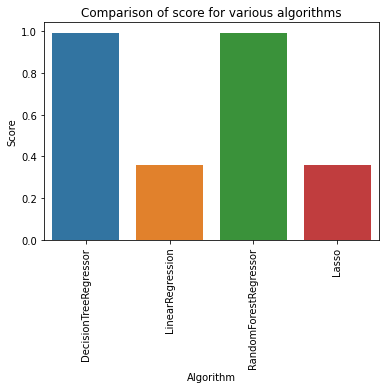

In [ ]:
sns.barplot(x='Algorithm',y='Score',data=data)
plt.title('Comparison of score for various algorithms')
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

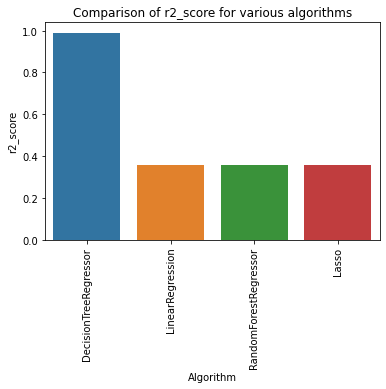

In [ ]:
sns.barplot(x='Algorithm',y='r2_score',data=data)
plt.title('Comparison of r2_score for various algorithms')
plt.xticks(rotation=90)

In [ ]:
df

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,0,1978.0,1,2244,0,110726,0,649,489,813.0,83247
1,0,1978.0,1,2244,0,12336,0,649,489,1743.0,83247
2,0,1978.0,1,2244,0,209115,0,671,485,4427.0,83247
3,0,1978.0,1,2244,0,86828,0,672,486,19805.0,83247
4,0,1978.0,1,2244,0,25207,0,789,571,34251.0,83247
...,...,...,...,...,...,...,...,...,...,...,...
327289,29,2011.0,294,3869,0,6377,0,634,489,2471.0,189320
327290,29,2011.0,294,3869,0,186024,0,323,306,3074.0,189320
327291,29,2011.0,294,3869,0,195799,0,277,219,4961.0,189320
327292,29,2011.0,294,3869,0,54456,0,471,350,73414.0,189320


In [ ]:
dt.predict([[29,2011.0,294,3869,0,132994,0,51,91,77817.0]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([189320.])